In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    'sarjana': [0, 0, 0, 1, 1, 1],
    'diterima': [0, 0, 1, 0, 1, 1]
})
# 1 root & 2 leaf = stump
# root node / starting question
# leaves / conclusion
# internal node / question branch
df

,sarjana,diterima
0,0,0
1,0,0
2,0,1
3,1,0
4,1,1
5,1,1


### Gini Impurity

- Hitung Gini untuk tiap leaf dalam feature: __gini S1True__ & __gini S1False__
- Gini $\displaystyle = 1 - $ (probability TRUE) $^2 - $ (probability FALSE) $^2$
- Hitung Gini total untuk 1 feature: __gini S1__

In [4]:
giniS1True = 1 - (2/3)**2 - (1/3)**2
giniS1False = 1 - (2/3)**2 - (1/3)**2
giniS1 = (3/6)*giniS1True + (3/6)*giniS1False
giniS1True, giniS1False, giniS1

(0.4444444444444445, 0.4444444444444445, 0.4444444444444445)

In [5]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df[['sarjana']], df['diterima'])
model.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

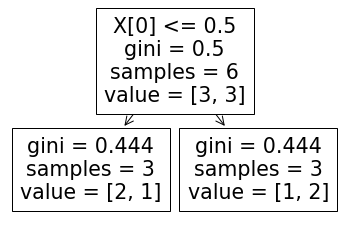

In [6]:
tree.plot_tree(model.fit(df[['sarjana']], df['diterima']))

In [ ]:
tree.export_graphviz(
    model.fit(df[['sarjana']], df['diterima']),
    out_file = 'decision.dot',
    feature_names = ['Sarjana'],
    class_names = ['Diterima', 'Tidak diterima']
)

### [https://dreampuf.github.io/GraphvizOnline](https://dreampuf.github.io/GraphvizOnline)

### Entropy & Gain

- Hitung Entropy untuk tiap leaf di feature: E(s1True) & E(s1False)
- Entropy $\displaystyle = \sum -p_i \cdot log_2 (p_i)$
- Gain = E - E.feature

In [7]:
Es1TruedTrue = -1 * (2/3) * np.log2(2/3)
Es1TruedFalse = -1 * (1/3) * np.log2(1/3)
Es1True = Es1TruedTrue + Es1TruedFalse
Es1TruedTrue, Es1TruedFalse, Es1True

(0.38997500048077083, 0.5283208335737187, 0.9182958340544896)

In [8]:
Es1FalsedTrue = -1 * (1/3) * np.log2(1/3)
Es1FalsedFalse = -1 * (2/3) * np.log2(2/3)
Es1False = Es1FalsedTrue + Es1FalsedFalse
Es1FalsedTrue, Es1FalsedFalse, Es1False

(0.5283208335737187, 0.38997500048077083, 0.9182958340544896)

In [9]:
Esarjana = -1 * (3/6) * np.log2(3/6) + -1 * (3/6) * np.log2(3/6)
Esarjana

1.0

In [10]:
# information Gain s1true = E sarjana - E s1 true
gains1true = Esarjana - Es1True
gains1true

0.08170416594551044

In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(df[['sarjana']], df['diterima'])
model.predict([[0]])[0]

0

[Text(167.4, 163.07999999999998, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

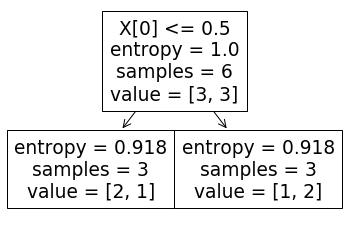

In [12]:
tree.plot_tree(model.fit(df[['sarjana']], df['diterima']))

In [13]:
df = pd.DataFrame([
    {'sarjana':0, 'sehat':1, 'supel':1, 'diterima':1},
    {'sarjana':1, 'sehat':0, 'supel':0, 'diterima':1},
    {'sarjana':0, 'sehat':1, 'supel':1, 'diterima':0},
    {'sarjana':0, 'sehat':0, 'supel':1, 'diterima':0},
    {'sarjana':1, 'sehat':0, 'supel':1, 'diterima':0},
])
df

,diterima,sarjana,sehat,supel
0,1,0,1,1
1,1,1,0,0
2,0,0,1,1
3,0,0,0,1
4,0,1,0,1


In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')
model.fit(df[['sarjana', 'sehat', 'supel']], df['diterima'])
model.predict([[0, 1, 1]])[0]

0

[Text(133.92000000000002, 181.2, 'X[2] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

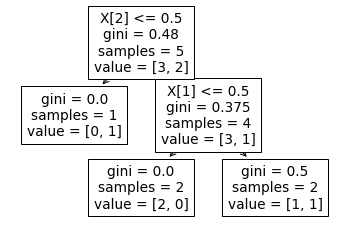

In [15]:
tree.plot_tree(
    model.fit(df[['sarjana', 'sehat', 'supel']], df['diterima'])
)

In [16]:
tree.export_graphviz(
    model.fit(df[['sarjana', 'sehat', 'supel']], df['diterima']),
    out_file = 'decision2.dot',
    feature_names = ['Sarjana', 'Sehat', 'Supel'],
    class_names = ['Diterima', 'Tidak diterima']
)

In [17]:
from sklearn.datasets import load_iris
x = load_iris()

In [19]:
df = pd.DataFrame(x['data'], columns=['sl','sw','pl','pw'])
df['target'] = x['target']
model = tree.DecisionTreeClassifier()
model.fit(df[['sl','sw','pl','pw']], df['target'])

# tree.export_graphviz(
#     model.fit(df[['sl','sw','pl','pw']], df['target']),
#     out_file = 'decisionIris.dot',
#     feature_names = ['SL', 'SW', 'PL', 'PW'],
#     class_names = x['target_names']
# )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')